In [28]:
from __future__ import unicode_literals, print_function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from word2number import w2n
import datetime
import docx2txt
import pickle
import plac
import random
from pathlib import Path
import spacy
from spacy.util import minibatch, compounding
import re
import datefinder
from nltk.chunk import tree2conlltags

In [14]:
import nltk
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
from nltk.corpus import stopwords
stop = stopwords.words('english')
nlp_model = spacy.load('en_core_web_sm')

In [ ]:
my_text = docx2txt.process(path)
seq = my_text.replace('\n',' ').replace('\t','').strip()

In [31]:
seq

'RENTAL AGREEMENT THIS DEED OF RENTAL AGREEMENT executed Chennai 19th day August 2013 between: Mrs. M. Geetha, W/o. V. Manoharan, aged 53 years, residing No.62-D, Saravana Flats, 1st Floor, Pinagapani Street, Devaki Nagar, Kundrathur, Chennai-600 069. Hereinafter called owner (Which expression shall, wherever context requires, deemed mean include legal heirs, executors, administrators assignees) one part. AND To favour M/s. Siruvani Traders Private Limited Represented Mr. J. L. Saravana, aged 33 years S/o M S Jambulingam, residing No. 13/5, Janakiraman Street, Muthurangam Block, Jafferkhanpet, Ashok Nagar, Chennai - 600 083, hereinafter called tenant (which expression shall, wherever context requires deemed mean include successors- in- interest assignees) part witnesses follows: -2- Whereas Mrs. M. Geetha absolute owner property No.62-D, Saravana Flats, 1st Floor, Pinagapani Street, Devaki Nagar, Kundrathur, Chennai - 600 069 measuring 250 sq.ft possession enjoyment same. Whereas tenan

# NLTK_NER(POS tagging and Chunking)

In [21]:
import nltk
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
from nltk.corpus import stopwords
stop = stopwords.words('english')

def ie_preprocess(document):
    document = ' '.join([i for i in document.split() if i not in stop])
    sentences = nltk.sent_tokenize(document)
    sentences = [nltk.word_tokenize(sent) for sent in sentences]
    sentences = [nltk.pos_tag(sent) for sent in sentences]
    return sentences

def extract_names(document):
    names = []
    sentences = ie_preprocess(document)
    for tagged_sentence in sentences:
        for chunk in nltk.ne_chunk(tagged_sentence):
            if type(chunk) == nltk.tree.Tree:
                if chunk.label() == 'PERSON':
                    names.append(' '.join([c[0] for c in chunk]))
    return sentences,names

In [22]:
sent,names = extract_names(seq)

In [24]:
sent[0]

[('RENTAL', 'JJ'),
 ('AGREEMENT', 'NNP'),
 ('THIS', 'NNP'),
 ('DEED', 'NNP'),
 ('OF', 'NNP'),
 ('RENTAL', 'NNP'),
 ('AGREEMENT', 'NNP'),
 ('executed', 'VBD'),
 ('Chennai', 'NNP'),
 ('19th', 'CD'),
 ('day', 'NN'),
 ('August', 'NNP'),
 ('2013', 'CD'),
 ('between', 'IN'),
 (':', ':'),
 ('Mrs.', 'NNP'),
 ('M.', 'NNP'),
 ('Geetha', 'NNP'),
 (',', ','),
 ('W/o', 'NNP'),
 ('.', '.')]

In [25]:
for i in sent:
    for j in i:
        if j[1]=='NNP':
            print(j)

('AGREEMENT', 'NNP')
('THIS', 'NNP')
('DEED', 'NNP')
('OF', 'NNP')
('RENTAL', 'NNP')
('AGREEMENT', 'NNP')
('Chennai', 'NNP')
('August', 'NNP')
('Mrs.', 'NNP')
('M.', 'NNP')
('Geetha', 'NNP')
('W/o', 'NNP')
('V.', 'NNP')
('Manoharan', 'NNP')
('No.62-D', 'NNP')
('Saravana', 'NNP')
('Flats', 'NNP')
('Floor', 'NNP')
('Pinagapani', 'NNP')
('Street', 'NNP')
('Devaki', 'NNP')
('Nagar', 'NNP')
('Kundrathur', 'NNP')
('Chennai-600', 'NNP')
('Hereinafter', 'NNP')
('M/s', 'NNP')
('Traders', 'NNP')
('Private', 'NNP')
('Limited', 'NNP')
('Mr.', 'NNP')
('J.', 'NNP')
('L.', 'NNP')
('Saravana', 'NNP')
('S/o', 'NNP')
('M', 'NNP')
('S', 'NNP')
('Jambulingam', 'NNP')
('Janakiraman', 'NNP')
('Street', 'NNP')
('Muthurangam', 'NNP')
('Block', 'NNP')
('Jafferkhanpet', 'NNP')
('Ashok', 'NNP')
('Nagar', 'NNP')
('Chennai', 'NNP')
('Whereas', 'NNP')
('Mrs.', 'NNP')
('M.', 'NNP')
('Geetha', 'NNP')
('No.62-D', 'NNP')
('Saravana', 'NNP')
('Flats', 'NNP')
('Floor', 'NNP')
('Pinagapani', 'NNP')
('Street', 'NNP')
('Dev

In [26]:
for i in sent:
    for j in i:
        if j[1]=='CD':
            print(j)

('19th', 'CD')
('2013', 'CD')
('53', 'CD')
('1st', 'CD')
('069', 'CD')
('one', 'CD')
('33', 'CD')
('13/5', 'CD')
('600', 'CD')
('083', 'CD')
('1st', 'CD')
('600', 'CD')
('069', 'CD')
('250', 'CD')
('2500', 'CD')
('1st', 'CD')
('069', 'CD')
('11', 'CD')
('2014', 'CD')
('5th', 'CD')
('4', 'CD')
('11', 'CD')
('1', 'CD')
('2', 'CD')


In [30]:
tree2conlltags(nltk.ne_chunk(sent[1]))

[('V.', 'NNP', 'O'),
 ('Manoharan', 'NNP', 'O'),
 (',', ',', 'O'),
 ('aged', 'VBD', 'O'),
 ('53', 'CD', 'O'),
 ('years', 'NNS', 'O'),
 (',', ',', 'O'),
 ('residing', 'VBG', 'O'),
 ('No.62-D', 'NNP', 'O'),
 (',', ',', 'O'),
 ('Saravana', 'NNP', 'B-PERSON'),
 ('Flats', 'NNP', 'I-PERSON'),
 (',', ',', 'O'),
 ('1st', 'CD', 'O'),
 ('Floor', 'NNP', 'O'),
 (',', ',', 'O'),
 ('Pinagapani', 'NNP', 'B-PERSON'),
 ('Street', 'NNP', 'I-PERSON'),
 (',', ',', 'O'),
 ('Devaki', 'NNP', 'B-PERSON'),
 ('Nagar', 'NNP', 'I-PERSON'),
 (',', ',', 'O'),
 ('Kundrathur', 'NNP', 'B-PERSON'),
 (',', ',', 'O'),
 ('Chennai-600', 'NNP', 'O'),
 ('069', 'CD', 'O'),
 ('.', '.', 'O')]

In [23]:
names

['Saravana Flats',
 'Pinagapani Street',
 'Devaki Nagar',
 'Kundrathur',
 'Hereinafter',
 'Siruvani',
 'Mr. J.',
 'Saravana',
 'Janakiraman Street',
 'Muthurangam Block',
 'Ashok Nagar',
 'Whereas',
 'Saravana Flats',
 'Pinagapani Street',
 'Devaki Nagar',
 'Kundrathur',
 'First Floor',
 'First Floor',
 'Saravana Flats',
 'Pinagapani Street',
 'Devaki Nagar',
 'Kundrathur',
 'Rented Flat',
 'Maintenance Water Charges']

In [ ]:
# Couldn't even get good results for PERSON entity which is generic

# USING PRETRAINED SPACY_NER

In [15]:
import docx2txt
import spacy 

def processing(path):
    
    
    my_text = docx2txt.process(path)
    
    
    seq = my_text.replace('\n',' ').replace('\t','').strip()

    
    seq = seq.replace('Rs.','').replace('Mrs,','Mrs.').replace('Mr .','Mr. ')    
    
    if re.findall('Mr.\w',seq):
        seq = re.sub('Mr.','Mr. ',seq)
    if re.findall('Mrs.\w',seq):
        seq = re.sub('Mrs.','Mrs. ',seq)
    if re.findall('Ms.\w',seq):
        seq = re.sub('Ms.','Ms. ',seq)
    seq = re.sub('Ms\s','Ms. ',seq)
#     print(4)
    
#   removing stop words and lowering the case  
    seq = ' '.join([i for i in seq.split() if i not in stop])
    
    print(5)

    return seq

def spacy_ner(seq):
    nlp = spacy.load('en_core_web_sm')

#     sentences = nltk.sent_tokenize(document)

    #     for i in 
    doc = nlp(seq) 

    tokens = nlp_model(seq)

    # for i in tokens:
    #     print(i,'->',i.dep_)

    dic = {'PERSON':[],'DATE':[],'EVENT':[],'CARDINAL':[],'MONEY':[]}

    for ent in doc.ents:
    #     print(ent)
        if ent.label_ == 'MONEY':
            dic[ent.label_].append([ent.text, ent.start_char, ent.end_char])
        if ent.label_ == 'PERSON':
            dic[ent.label_].append([ent.text, ent.start_char, ent.end_char])
        if ent.label_ == 'DATE':
            dic[ent.label_].append([ent.text, ent.start_char, ent.end_char])
        if ent.label_ == 'EVENT':
            dic[ent.label_].append([ent.text, ent.start_char, ent.end_char])
        if ent.label_ == 'CARDINAL':
            dic[ent.label_].append([ent.text, ent.start_char, ent.end_char])
            
    return dic

if __name__ == "__main__":
    
    res = []
    data_dir = './Training_data'
    for j,i in enumerate(os.listdir(data_dir)):
        print(i)
        path = data_dir + '/' + i
        try:
            seq = processing(path)
        except:
            continue
            
        print('No of files left',len(os.listdir(data_dir))-j)
        
        dic = spacy_ner(seq)
        res.append(dic)

203615996-Rental-Agreement-Format.pdf.docx
5
No of files left 45
251798216-Rental-Agreement-Format1.pdf.docx
5
No of files left 44
56736420-Rental-Agreement.pdf.docx
5
No of files left 43
267005869-Rental-Tenant.pdf.docx
5
No of files left 42
392810415-RENT-AGREEMENT.pdf.docx
5
No of files left 41
36199312-Rental-Agreement.pdf.docx
5
No of files left 40
77112358-Jaggu-Rental-Agreemnt.pdf.docx
5
No of files left 39
170499354-Anand-Nagar-Agreement.pdf.docx
5
No of files left 38
63057680-Rental-Agreement.pdf.docx
5
No of files left 37
.~lock.54770958-Rental-Agreement.pdf.docx#
288024755-Rental-Agreement-1.pdf.docx
5
No of files left 35
195231682-This-RENTAL-AGREEMENT-is-Made-and-Executed-on-24th-Day-of-September.pdf.docx
5
No of files left 34
142106117-Rental-Agreement.pdf.docx
5
No of files left 33
54770958-Rental-Agreement.pdf.docx
5
No of files left 32
6683129-House-Rental-Contract-Geraldine-Galinato-v2.pdf.docx
5
No of files left 31
116950326-December-2012-Rental-Agreement.pdf.docx
5


In [16]:
res

[{'PERSON': [['RENTAL', 2, 8], ['T.RADHA', 94, 101], ['AIilllJIT', 226, 235]],
  'DATE': [['1st day February 2008', 67, 88],
   ['monthly', 667, 674],
   ['Three Thousand', 695, 709],
   ['every month', 733, 744],
   ['Eleven Months commencing 1st day February 2008, month', 1034, 1087],
   ['regularly consecutive period', 1183, 1211],
   ['three months', 1212, 1224],
   ['One month', 1905, 1914],
   ['11 months', 2135, 2144],
   ['day, month', 2524, 2534],
   ['year first', 2536, 2546],
   ['9845444484 2', 2687, 2699],
   ['9448030266', 2706, 2716]],
  'EVENT': [],
  'CARDINAL': [['one', 212, 215],
   ['No-401', 264, 270],
   ['9886463146', 367, 377],
   ['3,500/-(Rupees', 680, 694],
   ['Twenty Thousand', 842, 857],
   ['two', 2360, 2363],
   ['1', 2565, 2566]],
  'MONEY': [['132/133', 419, 426]]},
 {'PERSON': [['Request number(SRF', 151, 169],
   ['Desk Name', 171, 180],
   ['Tube lights:-2', 856, 870],
   ['Bedrooms:-2', 880, 891],
   ['Geyser', 901, 907]],
  'DATE': [['Monthly', 26

In [17]:
# This Spacy_NER didn't work here properly as it is not trained on the entities that we are looking for. There are lots of 
# False Positives, I noticed wheneve capital word comes then it classify it as Person.

# Dependency Parsing & KG

RENTAL -> compound
AGREEMENT -> ROOT
THIS -> compound
DEED -> nsubj
OF -> prep
RENTAL -> compound
AGREEMENT -> pobj
executed -> ROOT
Chennai -> dobj
19th -> amod
day -> npadvmod
August -> npadvmod
2013 -> nummod
between -> prep
: -> punct
Mrs. -> compound
M. -> compound
Geetha -> pobj
, -> punct
W -> nmod
/ -> punct
o -> appos
. -> punct
DEED , AGREEMENT execute 19th 2013 , AGREEMENT Chennai Geetha
V. -> compound
Manoharan -> ROOT
, -> punct
aged -> amod
53 -> nummod
years -> npadvmod
, -> punct
residing -> acl
No.62-D -> dobj
, -> punct
Saravana -> compound
Flats -> conj
, -> punct
1st -> compound
Floor -> conj
, -> punct
Pinagapani -> compound
Street -> conj
, -> punct
Devaki -> compound
Nagar -> conj
, -> punct
Kundrathur -> conj
, -> punct
Chennai-600 -> npadvmod
069 -> nummod
. -> punct
 , Manoharan aged 53 069 , No.62-D
Hereinafter -> nsubj
called -> ROOT
owner -> dobj
( -> punct
Which -> det
expression -> nsubj
shall -> aux
, -> punct
wherever -> advmod
context -> nsubj
requires

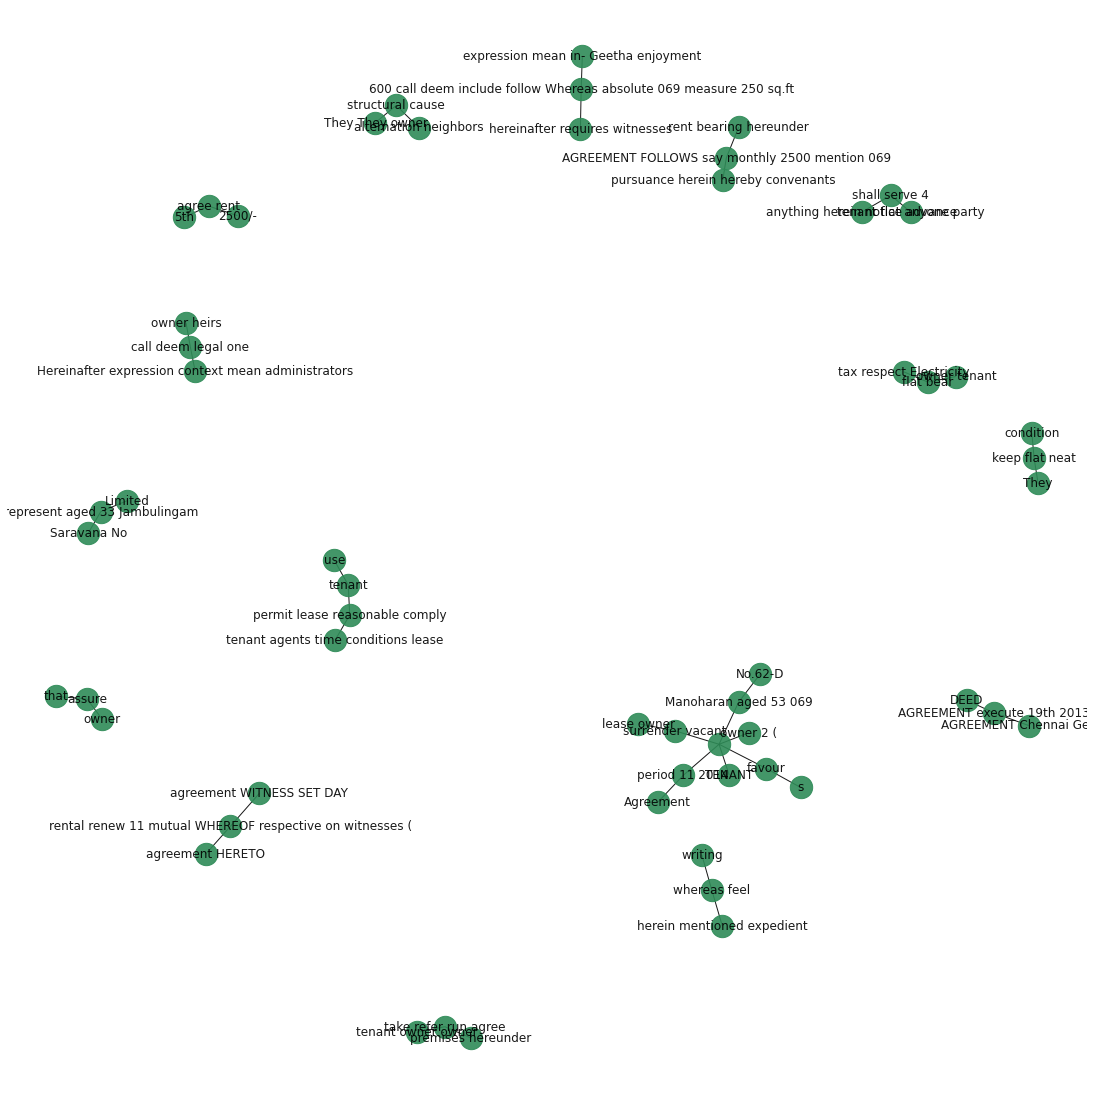

In [18]:
import spacy
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt

def getSentences(text):
    nlp = English()
    nlp.add_pipe(nlp.create_pipe('sentencizer'))
    document = nlp(text)
    return [sent.string.strip() for sent in document.sents]

def printToken(token):
    print(token.text, "->", token.dep_)

def appendChunk(original, chunk):
    return original + ' ' + chunk

def isRelationCandidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod","nummod"]
    return any(subs in token.dep_ for subs in deps)

def isConstructionCandidate(token):
    deps = ["compound", "prep", "conj", "mod"]
    return any(subs in token.dep_ for subs in deps)

def processSubjectObjectPairs(tokens):
    subject = ''
    object = ''
    relation = ''
    subjectConstruction = ''
    objectConstruction = ''
    for token in tokens:
        printToken(token)
        if "punct" in token.dep_:
            continue
        if isRelationCandidate(token):
            relation = appendChunk(relation, token.lemma_)
        if isConstructionCandidate(token):
            if subjectConstruction:
                subjectConstruction = appendChunk(subjectConstruction, token.text)
            if objectConstruction:
                objectConstruction = appendChunk(objectConstruction, token.text)
        if "subj" in token.dep_:
            subject = appendChunk(subject, token.text)
            subject = appendChunk(subjectConstruction, subject)
            subjectConstruction = ''
        if "obj" in token.dep_:
            object = appendChunk(object, token.text)
            object = appendChunk(objectConstruction, object)
            objectConstruction = ''
    print (subject.strip(), ",", relation.strip(), ",", object.strip())
    return (subject.strip(), relation.strip(), object.strip())

def processSentence(sentence):
    tokens = nlp_model(sentence)
    return processSubjectObjectPairs(tokens)

def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])

    pos = nx.spring_layout(G)
    plt.figure(figsize=(15,15))
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='seagreen', alpha=0.9,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show()

if __name__ == "__main__":

    sentences = getSentences(seq)
    nlp_model = spacy.load('en_core_web_sm')

    triples = []
#     print (text)
    for sentence in sentences:
        triples.append(processSentence(sentence))

    printGraph(triples)

In [19]:
# This is the statement for which I have generated dp and kg
seq

'RENTAL AGREEMENT THIS DEED OF RENTAL AGREEMENT executed Chennai 19th day August 2013 between: Mrs. M. Geetha, W/o. V. Manoharan, aged 53 years, residing No.62-D, Saravana Flats, 1st Floor, Pinagapani Street, Devaki Nagar, Kundrathur, Chennai-600 069. Hereinafter called owner (Which expression shall, wherever context requires, deemed mean include legal heirs, executors, administrators assignees) one part. AND To favour M/s. Siruvani Traders Private Limited Represented Mr. J. L. Saravana, aged 33 years S/o M S Jambulingam, residing No. 13/5, Janakiraman Street, Muthurangam Block, Jafferkhanpet, Ashok Nagar, Chennai - 600 083, hereinafter called tenant (which expression shall, wherever context requires deemed mean include successors- in- interest assignees) part witnesses follows: -2- Whereas Mrs. M. Geetha absolute owner property No.62-D, Saravana Flats, 1st Floor, Pinagapani Street, Devaki Nagar, Kundrathur, Chennai - 600 069 measuring 250 sq.ft possession enjoyment same. Whereas tenan

In [ ]:
# I couldn't get much informative triples(subject,relations,object), I think this is due to very varied information in the documents.